# Linear Regression Using Stochastic Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# creating data
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 800)

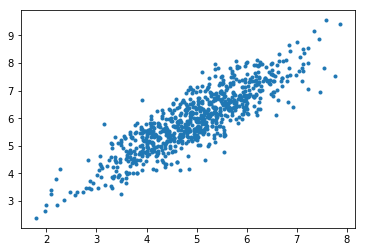

In [3]:
# visualising data
plt.scatter(data[:, 0], data[:, 1], marker = '.')
plt.show()

In [4]:
# train-test-split
data = np.hstack((np.ones((data.shape[0], 1)), data))

split_factor = 0.85
split = int(split_factor*data.shape[0])

X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1, 1))
X_test = data[split: , :-1]
y_test = data[split: , -1].reshape((-1, 1))

In [5]:
# linear regression using "stochastic" gradient descent
def hypothesis(x, theta):
    return np.dot(x, theta)

def cost(x, y, theta):
    h = hypothesis(x, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]

def gradient(x, y, theta):
    h = hypothesis(x, theta)
    grad = np.dot(x.transpose(), (h - y))
    return grad

def gradientDescent(X, y, u = 0.0015):
    theta = np.zeros((X.shape[1], 1))
    error_list = []
    m = X.shape[0]
    n = X.shape[1]
    max_itr = 1
    for itr in range(max_itr):
        for i in range(m):
            j = np.random.choice(m)
            theta = theta - u*gradient(X[j].reshape((1, n)), y[j].reshape((1, 1)), theta)
            error_list.append(cost(X[j].reshape((1, n)), y[j].reshape((1, 1)), theta))
    return theta, error_list

In [6]:
theta, error_list = gradientDescent(X_train, y_train)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])

Bias =  [0.24741189]
Coefficients =  [[1.1466983]]


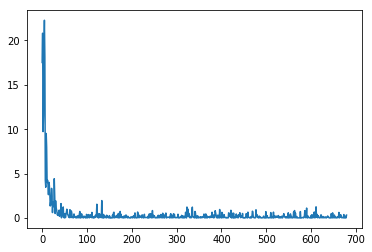

In [7]:
# visualising gradient descent
plt.plot(error_list)
plt.show()

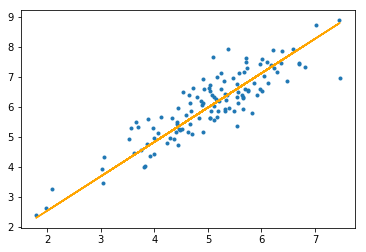

In [8]:
# predicting output for X_test
y_pred = hypothesis(X_test, theta)

plt.scatter(X_test[:, 1], y_test[:, ], marker = '.')
plt.plot(X_test[:, 1], y_pred, color = 'orange')
plt.show()

In [9]:
# calculating error in predictions
error = np.sum(np.abs(y_test - y_pred) / y_test.shape[0])
print("Mean absolute error = ", error)

Mean absolute error =  0.45364287965071937


# Linear Regression Using sklearn

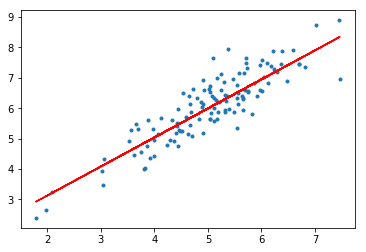

Mean absolute error =  0.4420324562710813


In [10]:
# importing dependencies, fitting the model, predicting output and calculating error in predictions
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

plt.scatter(X_test[:, 1], y_test[:, ], marker = '.')
plt.plot(X_test[:, 1], pred, color = 'red')
plt.show()

err = mean_absolute_error(pred, y_test)
print("Mean absolute error = ", err)